In [36]:
using Revise
includet("diatomic.jl")

using .diatomic_jl.MoleculeTypes
using .diatomic_jl


## Search for Magic Conditions with Magnetic and Electric Fields

In [43]:
MoleculeOperator = Molecule.generateMolecule(K40Rb87T, 2)
Hmol = Hamiltonian.generateHamiltonian(MoleculeOperator, dirB = [0, 0, 1.0],  dirE = [0.0, 1.0, 0.0]);
zeemanScan = solve.scanZeeman(Hmol, [0:1:20...]*1e-4, 0);#, nev = 10);

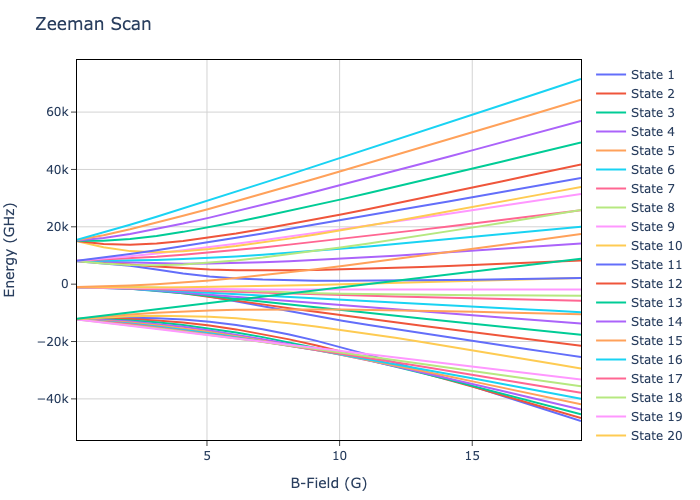

In [44]:
plotting.plotDiabiatic(Hmol, zeemanScan, "B", N= [0])

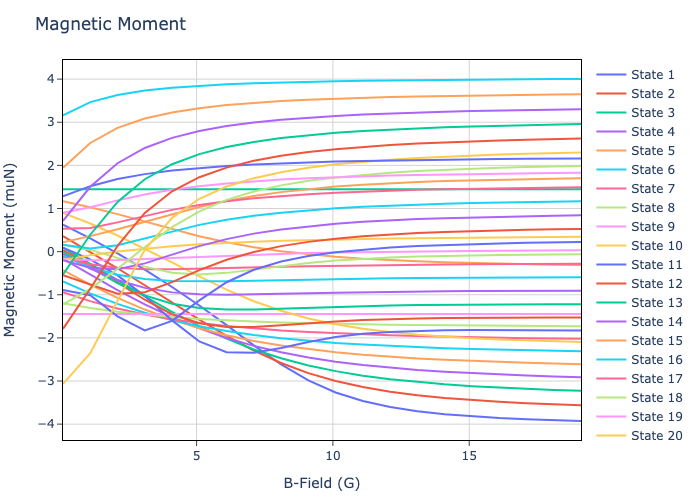

In [45]:
plotting.plotMagneticMoment(Hmol, zeemanScan, "B", N = [0])

In [31]:
mag_mom = calculate.magnetic_moment(Hmol, zeemanScan);

In [32]:
Q0 =  State([0.0, 0.0, 0.5, 1.5, -4.0, 4.0], Hmol)
Q1 =  State([0.0, 0.0, 1.5, 1.5, -4.0, 4.0], Hmol)
Q0_qn  = calculate.findMaxOverlap(Q0, zeemanScan[end].vec)
Q1_qn = calculate.findMaxOverlap(Q1, zeemanScan[end].vec)

1

In [33]:
using Interpolations
using Roots
function find_Intercept(x, cf_1, cf_2)
    interp_f = LinearInterpolation(x, cf_1, extrapolation_bc=Flat())
    interp_g = LinearInterpolation(x, cf_2,extrapolation_bc=Flat())
    diff_func(x) = interp_f(x) - interp_g(x)
    int_x = find_zero(diff_func, x[2])
    return (int_x, diff_func(int_x))
end


find_Intercept (generic function with 1 method)

In [34]:
scan_var = [sol_i.B_field for sol_i in zeemanScan]
find_Intercept(scan_var, mag_mom[Q0_qn, :],mag_mom[Q1_qn, :] )

Roots.ConvergenceFailed: Roots.ConvergenceFailed("Algorithm failed to converge")

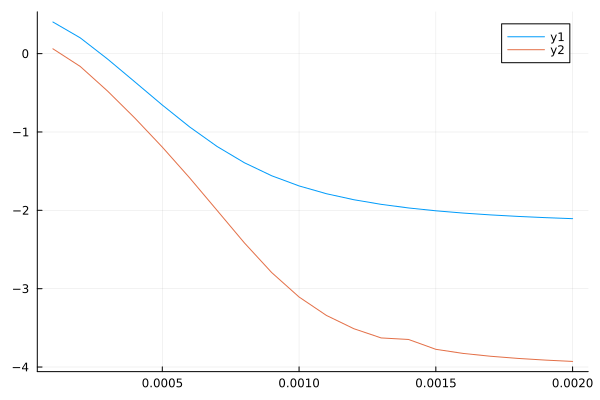

In [35]:
using Plots
plot(scan_var, mag_mom[Q0_qn, :])
plot!(scan_var, mag_mom[Q1_qn, :])

## Search for Magic Conditions with ODT